## Utility Functions

In [1]:
def get_all_possible_combination(lop):
    ok = [y for x in lop for y in x]
    abc = pd.DataFrame(ok, columns = ['first_token', 'second_token', 'st', 'lot', 'ig', 'row_index'])
    new_abc = abc.explode(['st', 'lot','row_index'])
    new_abc['posdis'] = new_abc['second_token'] - new_abc['first_token']
    new_abc = new_abc.rename(columns = { 'st' : 'tensor'})[['tensor', 'posdis', 'row_index', 'first_token', 'second_token']]
    new_abc['predicted_token_dist_from_start'] = new_abc[['tensor']].apply(lambda x : list(range(0, 0 + len(x['tensor']))), axis=1)
    new_abc = new_abc.explode(['tensor', 'predicted_token_dist_from_start'])
    new_abc['tensor'] = new_abc['tensor'].apply(lambda x : float(x))
    new_abc['min_dist'] = new_abc['predicted_token_dist_from_start'] - new_abc['second_token']
    return new_abc



In [2]:

def get_weak_mwe(new_abc, mwe):
    from itertools import combinations
    mwe = mwe[['index', 'weak_mwe', 'strong_mwe', 'row_number']].copy()
    mwe['weak_toks'] = mwe['weak_mwe'].apply(lambda x : [list(combinations(y, 2)) for y in x])
    mwe = mwe.explode(['weak_mwe', 'weak_toks']).explode('weak_toks')
    mwe = mwe.rename(columns = {'index' : 'row_index'})
    mwe[['first_token', 'second_token']] = pd.DataFrame(mwe['weak_toks'].tolist(), index=mwe.index)
    mwe = mwe.dropna(subset=['first_token', 'second_token'])
    mwe[['first_token', 'second_token']] = mwe[['first_token', 'second_token']].astype(int)
    mwe['posdis'] = mwe['second_token'] - mwe['first_token']
    mwe = mwe[['row_number', 'first_token', 'second_token', 'posdis', 'row_index']].copy()
    new_mwe = new_abc.merge(mwe, on = ['row_index','first_token','second_token','posdis'])
    new_mwe['first_token'] -= 1 
    new_mwe['second_token'] -= 1 
    return new_mwe



In [3]:
def get_strong_mwe(new_abc, mwe):
    from itertools import combinations
    mwe = mwe[['index',  'strong_mwe', 'row_number']].copy()
    mwe['strong_toks'] = mwe['strong_mwe'].apply(lambda x : [list(combinations(y, 2)) for y in x])
    mwe = mwe.explode(['strong_mwe', 'strong_toks']).explode('strong_toks')
    mwe = mwe.rename(columns = {'index' : 'row_index'})
    mwe = mwe.dropna(subset=['strong_mwe'])
    mwe[['first_token', 'second_token']] = pd.DataFrame(mwe['strong_toks'].tolist(), index=mwe.index)
    mwe = mwe.dropna(subset=['first_token', 'second_token'])
    mwe[['first_token', 'second_token']] = mwe[['first_token', 'second_token']].astype(int)
    mwe['posdis'] = mwe['second_token'] - mwe['first_token']
    mwe = mwe[['row_number', 'first_token', 'second_token', 'posdis','row_index']].copy()
    strong_mwe = new_abc.merge(mwe, on = ['row_index','first_token','second_token','posdis'])
    strong_mwe['first_token'] -= 1 
    strong_mwe['second_token'] -= 1 
    return strong_mwe

In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# def plot(strong_df, weak_df, avg_df):
#     fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True, sharex=True)
#     strong_df = strong_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
#     weak_df = weak_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
#     avg_df = avg_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})

#     strong_df = strong_df[strong_df[f'$d_i$'] <= 4]
#     weak_df = weak_df[weak_df[f'$d_i$'] <= 4]
#     avg_df = avg_df[avg_df[f'$d_i$'] <= 4]

#     for i in range(-3, 3):
#         for j in [0]:
#             min_dist = j*4 + i + 1
            
#             strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='strong mwe')
#             weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='weak mwe')
#             avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='all')
#             axes[i].set_title(f'$d_p$ = {min_dist}')
#             # if i != 2:
#             # axes[i].set_xlabel(f'$d_i$', labelpad=-5)
#             handles, labels = axes[i].get_legend_handles_labels()
#             axes[i].get_legend().remove()
#     # plt.legend()
#     plt.subplots_adjust(bottom=0.5)
#     fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
#     plt.tight_layout()
#     plt.savefig('alm_experiment', bbox_inches='tight')
#     plt.show()

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
def plot(strong_df, weak_df, avg_df, fig_path = 'alm_experiment'):
    fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True, sharex=True)
    strong_df = strong_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    weak_df = weak_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    avg_df = avg_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})

    strong_df = strong_df[strong_df[f'$d_i$'] <= 4]
    weak_df = weak_df[weak_df[f'$d_i$'] <= 4]
    avg_df = avg_df[avg_df[f'$d_i$'] <= 4]

    for i in range(0, 6):
        for j in [0]:
            min_dist = j*4 + i +1
            
            strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='strong mwe')
            weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='weak mwe')
            avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='all')
            axes[i].set_title(f'$d_p$ = {min_dist}')
            # if i != 2:
            # axes[i].set_xlabel(f'$d_i$', labelpad=-5)
            handles, labels = axes[i].get_legend_handles_labels()
            axes[i].get_legend().remove()
    # plt.legend()
    plt.subplots_adjust(bottom=0.5)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
    plt.tight_layout()
    plt.savefig(fig_path, bbox_inches='tight')
    plt.show()



## BERT 

In [6]:
import gc
import pickle
import os
import pandas as pd

In [ ]:
import gc
import pickle
import os
import pandas as pd
# lop = pd.read_pickle('output/avg_2_bert100_16387.pkl', compression='gzip')
lop = []
for l in range(1000, 53000, 1000):
    print(l)

    if os.path.exists(f'output2/all_comb_avg_2_bert100_{l}.pkl'):
        continue
    # lop.extend(pd.read_pickle(f'output2/avg_2_bert100_{l}.pkl', compression='gzip'))
    get_all_possible_combination(pd.read_pickle(f'output2/avg_2_bert100_{l}.pkl', compression='gzip')).to_pickle(f'output2/all_comb_avg_2_bert100_{l}.pkl',compression='gzip')
                                                                                                                 

for l in range(1000, 53000, 1000):
    print(l)
    lop.append(pd.read_pickle(f'output2/all_comb_avg_2_bert100_{l}.pkl',compression='gzip'))

# new_abc = get_all_possible_combination(lop)
new_abc = pd.concat(lop)
new_abc.to_pickle('output2/all_comb_bert100.pkl', compression='gzip')
from experiment_runner import *
self = ExperimentRunner(cuda=True, seq_len=20, model_name = 'bert', method=105)
self.prepare_data()
mwe = self.test.reset_index(drop=True).reset_index()
mwe.to_pickle('output2/mwe_bert100.pkl', compression='gzip')
del self.test
del self
del lop
gc.collect()

In [6]:
new_abc = pd.read_pickle('output2/all_comb_bert100.pkl', compression='gzip')
mwe = pd.read_pickle('output2/mwe_bert100.pkl', compression='gzip')

In [9]:
print('weak start')

weak_mwe = get_weak_mwe(new_abc, mwe)
weak_mwe.to_pickle('output/weak_bert_mwe.pkl')
print('weak_loaded')

strong_mwe = get_strong_mwe(new_abc, mwe)

weak start
weak_loaded


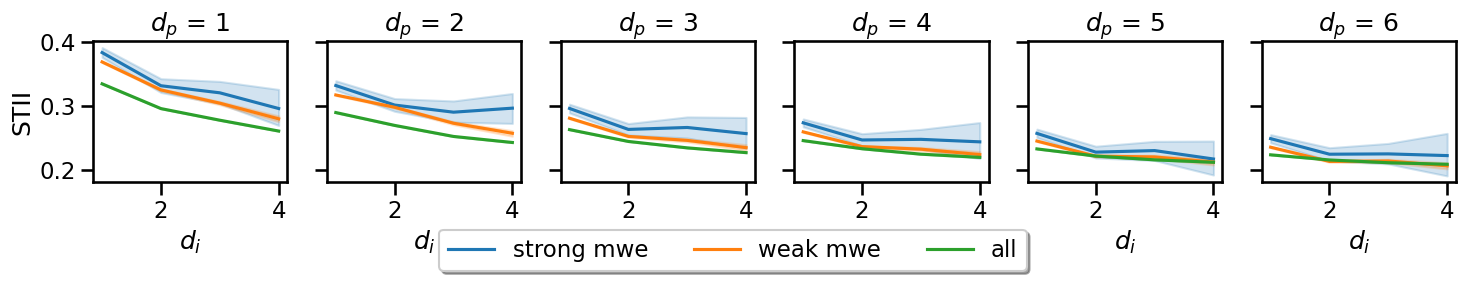

In [10]:
plot(strong_mwe, weak_mwe, new_abc, "mlm-experiment-updated_1.pdf")

In [11]:
len(strong_mwe), len(weak_mwe), len(new_abc)

(32260, 1938260, 103950000)

In [7]:
weak_mwe = pd.read_pickle('output/weak_bert_mwe.pkl')

min_dist
1    0.280791
2    0.256012
3    0.237086
4    0.227300
5    0.217847
6    0.212381
Name: tensor, dtype: float64

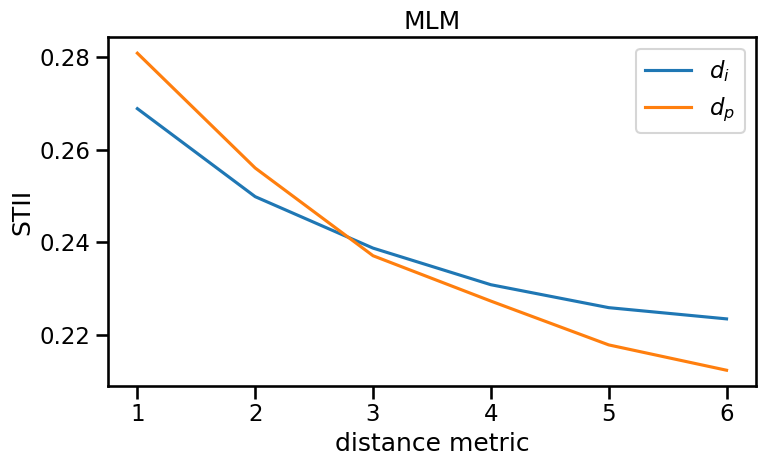

In [13]:
new_new_abc = new_abc[(new_abc['min_dist'] > 0) & (new_abc['min_dist'] < 7)].copy()

posdis_means= new_new_abc.groupby('posdis')['tensor'].mean()
min_dist_means = new_new_abc.groupby('min_dist')['tensor'].mean()

min_dist_means  = min_dist_means[min_dist_means.index > 0]
min_dist_means  = min_dist_means[min_dist_means.index < 7]
display(min_dist_means)
plt.figure(figsize=(8, 5))
plt.plot(posdis_means, label='$d_{i}$')
plt.plot(min_dist_means, label='$d_{p}$')

# Add labels and legend
plt.xlabel('distance metric')
plt.ylabel('STII')
plt.title('MLM')
# plt.yticks([0.6, 0.9, 1.2, 1.5])  # Adjust the range if needed
# plt.yticks([0.7, 0.9, 1.1, 1.3])  # Adjust the range if needed
plt.legend()
plt.tight_layout()
plt.savefig('mlm_avg_experiment-updated1.pdf', bbox_inches='tight')


0
1
2
3


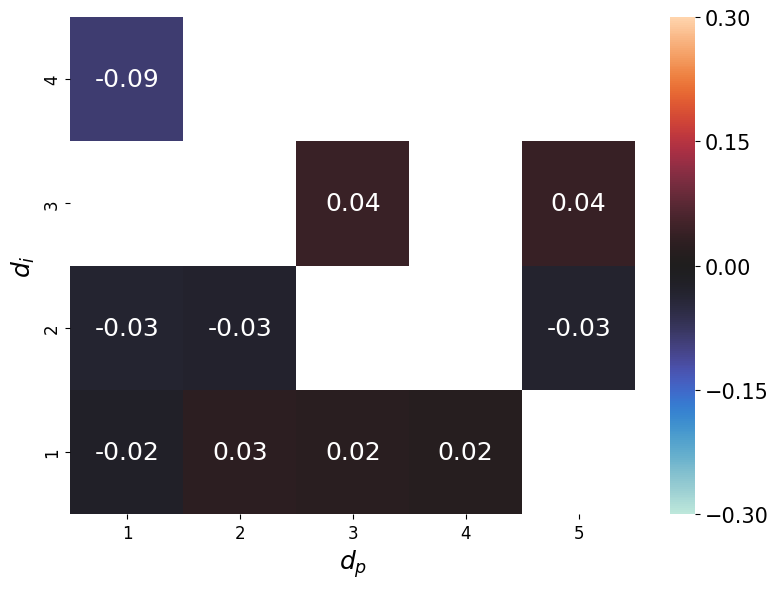

In [40]:
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    print(i)
    abc = pd.read_pickle(f'../mwe_tagger/bert_bert.pkl_{i}')
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_mwe.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))

ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>50]
# zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=5]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
zp = zp[zp['diff_syn']==1]

# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# zp = zp[zp['diff_syn']>=5]



from scipy.stats import pearsonr, spearmanr
# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])


z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
y = y[y['posdis'] <= 5]
# mask_apq = y[(y['min_dist'].abs()<=5)].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq = y[(y['min_dist']<=5) & (y['min_dist'] > 0)].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)
# mask_apq = np.where(mask_apq > 0.05, 1, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
z = z[z['posdis'] <= 5]

# apq = z[(z['min_dist'].abs()<=5) ].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq = z[(z['min_dist']<=5) & (z['min_dist'] > 0)].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(8,6))

ax = sns.heatmap(apq, annot=True, center=0, vmin=-0.3, vmax=0.3, fmt=".2f", annot_kws={"size": 18},  cbar_kws={"ticks": [-0.3, -0.15, 0, 0.15, 0.3] })
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.xlabel('$d_p$', fontsize = 18) # x-axis label with fontsize 15
plt.ylabel('$d_i$', fontsize = 18) # y-axis label with fontsize 15
plt.tight_layout()
plt.savefig('mlm_syntactic_box.pdf', bbox_inches='tight')
plt.show()

In [18]:
# zp[zp.index< (4, 10)].groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].count()

In [71]:
apl = zp[(zp['posdis'] == 3) & (zp['min_dist'] == 5)]
apl[['tensor', 'syntactic_distance_idx_mapped']]

,tensor,syntactic_distance_idx_mapped
1469,0.200721,2
1653,0.342279,1
2278,0.182737,3
6330,0.188876,1
7130,0.293523,2
...,...,...
277450,0.300874,2
278294,0.664405,1
278595,0.336711,1
278829,0.221371,4


<Axes: xlabel='tensor', ylabel='syntactic_distance_idx_mapped'>

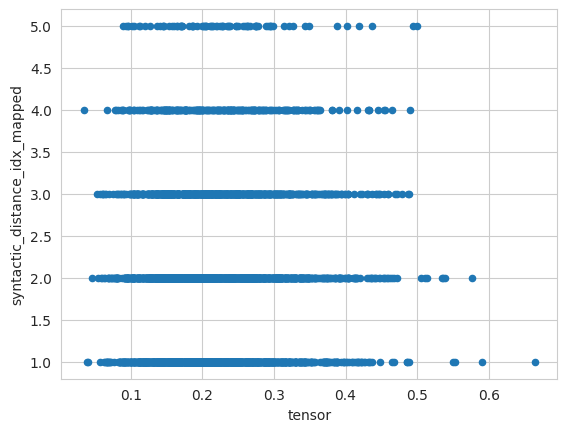

In [72]:
apl[['tensor', 'syntactic_distance_idx_mapped']].plot(kind='scatter', x = 'tensor', y = 'syntactic_distance_idx_mapped')

In [73]:
apl[['tensor', 'syntactic_distance_idx_mapped']].groupby('syntactic_distance_idx_mapped')['tensor'].apply(lambda x : x.mean() + x.std()).reset_index()#.corr()

,syntactic_distance_idx_mapped,tensor
0,1,0.297074
1,2,0.304348
2,3,0.304537
3,4,0.310682
4,5,0.315239


<Axes: xlabel='tensor', ylabel='syntactic_distance_idx_mapped'>

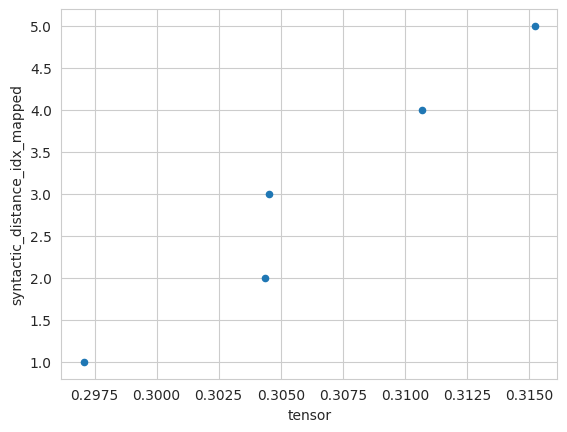

In [74]:
apl[['tensor', 'syntactic_distance_idx_mapped']].groupby('syntactic_distance_idx_mapped')['tensor'].apply(lambda x : x.mean() + x.std()).reset_index().plot(kind='scatter', x = 'tensor', y = 'syntactic_distance_idx_mapped')

<Axes: xlabel='tensor', ylabel='syntactic_distance_idx_mapped'>

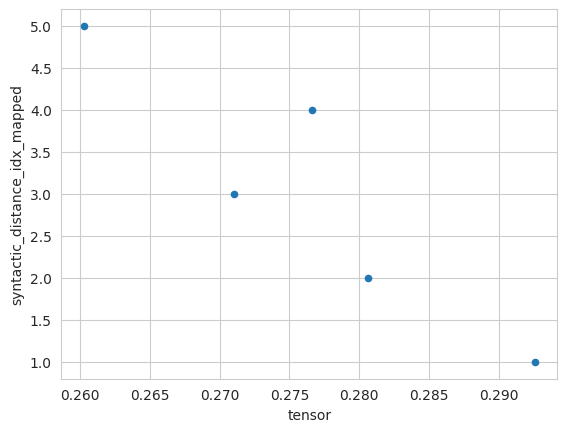

In [58]:
apl[['tensor', 'syntactic_distance_idx_mapped']].groupby('syntactic_distance_idx_mapped')['tensor'].mean().reset_index().plot(kind='scatter', x = 'tensor', y = 'syntactic_distance_idx_mapped')

In [ ]:
apl[['tensor', 'syntactic_distance_idx_mapped']].corr()#plot(kind='scatter', x = 'tensor', y = 'syntactic_distance_idx_mapped')

In [ ]:
# .groupby('syntactic_distance_idx_mapped')['tensor'].mean().reset_index()

# GPT

In [9]:
import gc
import pickle
import os
import pandas as pd

# lop = pd.read_pickle('output/avg_2_bert100_16387.pkl', compression='gzip')
lop = []
for l in range(1000, 31000, 1000):
    print(l)

    if os.path.exists(f'output2/all_comb_avg_2_gpt100_{l}.pkl'):
        continue
    # lop.extend(pd.read_pickle(f'output2/avg_2_bert100_{l}.pkl', compression='gzip'))
    if os.path.exists(f'output2/avg_2_gpt100_{l}.pkl'):
        get_all_possible_combination(pd.read_pickle(f'output2/avg_2_gpt100_{l}.pkl', compression='gzip')).to_pickle(f'output2/all_comb_avg_2_gpt100_{l}.pkl',compression='gzip')
                                                                                                                 

for l in range(1000, 31000, 1000):
    print(l)
    if os.path.exists(f'output2/all_comb_avg_2_gpt100_{l}.pkl'):
        lop.append(pd.read_pickle(f'output2/all_comb_avg_2_gpt100_{l}.pkl',compression='gzip'))

# new_abc = get_all_possible_combination(lop)
new_gpt_abc = pd.concat(lop)
new_gpt_abc.to_pickle('output2/all_comb_gpt100.pkl', compression='gzip')


# lop = pd.read_pickle('output2/avg_2_gpt100_8195.pkl', compression='gzip')
# new_gpt_abc = get_all_possible_combination(lop)
from experiment_runner import *
self = ExperimentRunner(cuda=True, seq_len=20, model_name = 'bert', method=105)
self.prepare_data()
mwe_gpt = self.test.reset_index()

weak_gpt_mwe = get_weak_mwe(new_gpt_abc, mwe_gpt)
strong_gpt_mwe = get_strong_mwe(new_gpt_abc, mwe_gpt)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
58830


In [10]:
weak_gpt_mwe.to_pickle('output/weak_gpt_mwe.pkl')

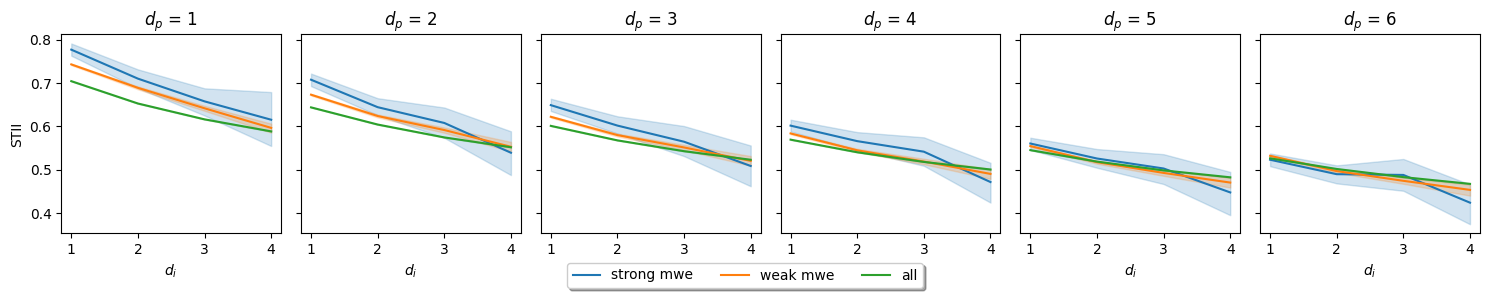

In [11]:
plot(strong_gpt_mwe, weak_gpt_mwe, new_gpt_abc,  "llm-experiment-updated.pdf")

In [14]:
new_gpt_abc.groupby('posdis')['tensor'].mean()

posdis
1    0.305973
2    0.278743
3    0.256360
4    0.237268
5    0.220476
6    0.205235
Name: tensor, dtype: float64

min_dist
1    0.619096
2    0.576403
3    0.544164
4    0.519445
5    0.499970
6    0.484433
Name: tensor, dtype: float64

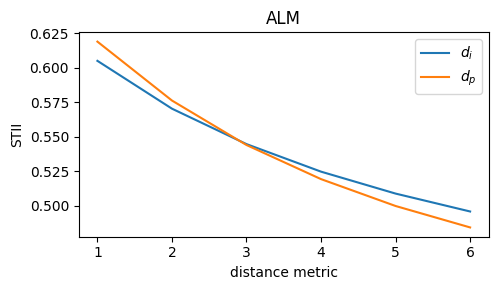

In [16]:
new_gpt_abc_ok = new_gpt_abc[(new_gpt_abc['min_dist'] > 0) & (new_gpt_abc['min_dist'] < 7)].copy()
posdis_means= new_gpt_abc_ok.groupby('posdis')['tensor'].mean()
min_dist_means = new_gpt_abc_ok.groupby('min_dist')['tensor'].mean()

min_dist_means  = min_dist_means[min_dist_means.index > 0]
min_dist_means  = min_dist_means[min_dist_means.index < 7]
display(min_dist_means)
plt.figure(figsize=(5, 3))
plt.plot(posdis_means, label='$d_{i}$')
plt.plot(min_dist_means, label='$d_{p}$')

# Add labels and legend
plt.xlabel('distance metric')
plt.ylabel('STII')
plt.title('ALM')
# plt.yticks([0.6, 0.9, 1.2, 1.5])  # Adjust the range if needed
# plt.yticks([0.7, 0.9, 1.1, 1.3])  # Adjust the range if needed
plt.legend()
plt.tight_layout()
plt.savefig('alm_avg_experiment-updated.pdf', bbox_inches='tight')

In [17]:
del new_gpt_abc

In [7]:
weak_gpt_mwe = pd.read_pickle('output/weak_gpt_mwe.pkl')

In [8]:
# Remove tokens which are part of same words. 
# 
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    print(i)
    abc = pd.read_pickle(f'../mwe_tagger/gpt_gpt.pkl_{i}').drop(columns = ['sentence', 'd', 'toks', 'tags', '_', '~', 'lemmas', 'tokens', 'sent',
       'syntactic_distance_idx', 'tokens_to_map', 'token_map', 'token_map_dict', 'weak_mwe', 'strong_mwe'])
    def foo(x):
        g = {}
        for tup, val in x.items():
            if len(tup) == 2: 
                for a in tup[0]:
                    for b in tup[1]:
                        g[(a, b)] = val
        return g
    abc['syntactic_distance_idx_mapped'] = abc['syntactic_distance_idx_mapped'].apply(foo)
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_gpt_mwe.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))


ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

0
1
2
3


[1 2 3 4 5]


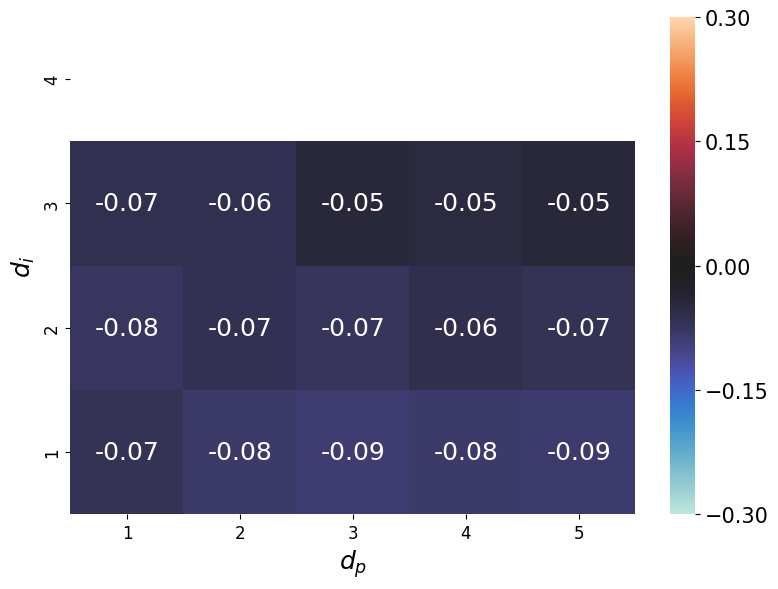

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>50]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=6]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
print(zp['posdis'].unique())
zp = zp[zp['diff_syn']==1]

zp = zp[zp['min_dist']>0].copy()
from scipy.stats import pearsonr, spearmanr

z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])
y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
mask_apq = y[y['min_dist'].abs()<=5].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
apq = z[z['min_dist'].abs()<=5].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(8,6))

# ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.2, vmax=0.1, fmt=".2f", annot_kws={"size": 18})#,  cbar_kws={"ticks": 5})
ax = sns.heatmap(apq, annot=True, center=0, vmin=-0.3, vmax=0.3, fmt=".2f", annot_kws={"size": 18},  cbar_kws={"ticks": [-0.3, -0.15, 0, 0.15, 0.3]})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.xlabel('$d_p$', fontsize = 18) # x-axis label with fontsize 15
plt.ylabel('$d_i$', fontsize = 18) # y-axis label with fontsize 15
plt.tight_layout()
plt.savefig('alm_syntactic_box.pdf', bbox_inches='tight')
plt.show()


In [ ]:
zp

In [ ]:
ls -l output2/

In [ ]:

import pandas as pd
lop = pd.read_pickle('output2/avg_2_bert100_2000.pkl', compression='gzip')

In [ ]:
len(lop)
